In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Basic_DeepLearning/Raw Algotithms Implementation /Linear Regression

/content/drive/MyDrive/Basic_DeepLearning/Raw Algotithms Implementation /Linear Regression


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def predict_func(features, weights):
    return np.dot(features, weights)

In [5]:
def cost_func(features, weights, labels, num):
    cost = np.sum(np.square(np.dot(features, weights) - labels))
    return cost / (2*num)

In [6]:
def update_func(features, weights, labels, num, learning_rate):
    cost_der = np.dot(features.T, np.dot(features, weights) - labels) / num
    weights -= learning_rate * cost_der
    return weights

In [7]:
def train(features, weights, labels, num, learning_rate, epoches):
  cost_his = []
  for i in range(epoches):
      weights = update_func(features, weights, labels, num, learning_rate)
      cost = cost_func(features, weights, labels, num)
      cost_his.append(cost)
  return weights, cost_his

In [8]:
my_df = pd.read_csv("Advertising.csv")
my_df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
data = pd.DataFrame(my_df['radio']).to_numpy()
labels = pd.DataFrame(my_df['sales']).to_numpy()

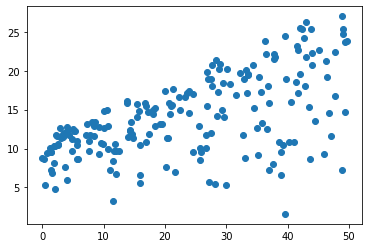

In [10]:
plt.scatter(data, labels);

In [11]:
N = data.shape[0]
features = np.hstack((data, np.ones((N, 1))))

In [12]:
num = len(features)
weights = np.array([0.0014, 0.03]).reshape(-1, 1)
weights, cost_his = train(features, weights, labels, num, 0.0008, 10000)

+ WEIGHTS: 
 [[0.23077963]
 [8.38734198]]
+ COST: 
 [35.10430985075796, 23.508642773369065, 21.731064319188228, 21.454480001129678, 21.407370277238925, 21.395344912403417, 21.388685476536597, 21.38284860739075, 21.377139713554506, 21.371452604690784, 21.365771045370295, 21.36009255249361, 21.35441674542151, 21.348743564939895, 21.343073000974695, 21.337405050964854, 21.331739713498365, 21.32607698733937, 21.32041687127941, 21.31475936411468, 21.30910446464256, 21.303452171661082, 21.29780248396884, 21.29215540036499, 21.286510919649235, 21.280869040621848, 21.275229762083626, 21.269593082835947, 21.263959001680725, 21.258327517420433, 21.252698628858102, 21.2470723347973, 21.24144863404215, 21.235827525397337, 21.23020900766808, 21.22459307966017, 21.21897974017993, 21.213368988034244, 21.207760822030547, 21.2021552409768, 21.19655224368155, 21.190951828953867, 21.185353995603382, 21.179758742440267, 21.174166068275248, 21.168575971919605, 21.162988452185147, 21.157403507884247, 21.151

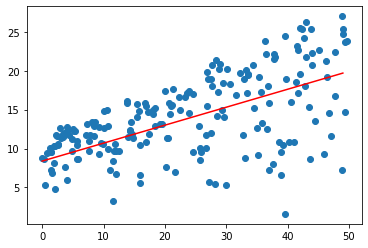

In [13]:
print("+ WEIGHTS: \n", weights)
print("+ COST: \n", cost_his)
plt.scatter(data, labels)
x = np.arange(50)
plt.plot(x, weights[0]*x + weights[1], c = 'r');

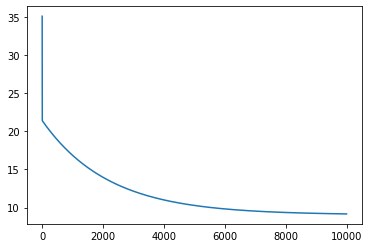

In [14]:
plt.plot(cost_his);

## ***Linear Regression as Parabol***

In [ ]:
df = pd.read_csv("data_square.csv")
df.head()

,Diện tích,Giá nhà
0,30.0000,-100.000
1,32.4138,-190.725
2,34.8276,-269.798
3,37.2414,-337.218
4,39.6552,-392.985


### ***Data Normalization***

In [ ]:
new_df = df.apply(lambda data: (data - data.min(axis = 0)) / (data.max(axis = 0) - data.min(axis = 0)))
new_df.head()

,Diện tích,Giá nhà
0,0.000000,0.159840
1,0.034483,0.123543
2,0.068966,0.091908
3,0.103449,0.064935
4,0.137931,0.042624


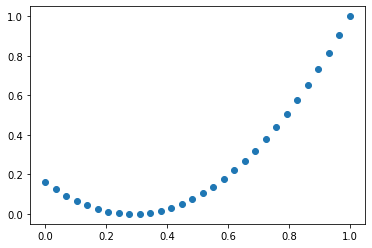

In [ ]:
feature = new_df['Diện tích'].to_numpy().reshape(-1, 1)
labels = new_df['Giá nhà'].to_numpy().reshape(-1, 1)
plt.scatter(feature, labels);

### ***Prepare Data***

In [ ]:
features = np.hstack((np.square(feature), feature, np.ones((feature.shape[0], 1))))

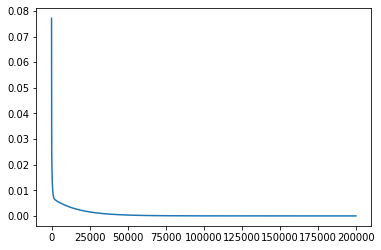

In [ ]:
num = len(features)
weights = np.zeros((features.shape[1], 1))
weights, cost_his = train(features, weights, labels, num, 0.01, 200000)
plt.plot(cost_his);

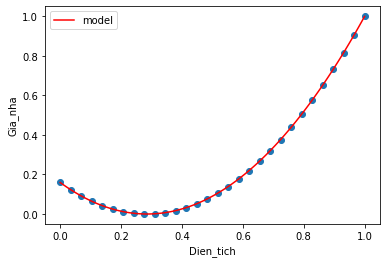

In [ ]:
plt.scatter(feature, labels)
a = []
b = []
for i in np.linspace(0, 1, 100):
  a.append(i)
  b.append(weights[0]*i*i + weights[1]*i + weights[2])
plt.xlabel("Dien_tich")
plt.ylabel("Gia_nha")
plt.plot(a, b, c = 'r', label = 'model')
plt.legend();